In [1]:
from pyxlma.lmalib.io import read as lma_read
from pyxlma.plot.interactive import InteractiveLMAPlot
from pyxlma.lmalib.flash.cluster import cluster_flashes
from pyxlma.lmalib.flash.properties import flash_stats
import numpy as np

In [2]:
%matplotlib widget

In [3]:
lmad, file_start = lma_read.dataset(['lma/0616/LYLOUT_230616_010000_0600.dat.gz'])
lmad = flash_stats(cluster_flashes(lmad))
lmad

/Users/stgardner4/micromamba/envs/raxpol/lib/python3.12/site-packages/pyxlma/coords.py:81: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  projectedData = array(proj4.transform(self.ERSlla, self.ERSxyz, lon, lat, alt ))


<xarray.Dataset>
Dimensions:                              (number_of_stations: 17,
                                          number_of_events: 657140,
                                          number_of_flashes: 57333)
Coordinates:
  * number_of_flashes                    (number_of_flashes) uint64 0 ... 57332
Dimensions without coordinates: number_of_stations, number_of_events
Data variables: (12/42)
    network_center_latitude              float64 35.28
    network_center_longitude             float64 -97.92
    network_center_altitude              float64 417.9
    station_latitude                     (number_of_stations) float32 35.18 ....
    station_longitude                    (number_of_stations) float32 -97.44 ...
    station_altitude                     (number_of_stations) float32 346.0 ....
    ...                                   ...
    flash_event_count                    (number_of_flashes) uint32 3 42 ... 1 1
    event_parent_flash_id                (number_of_events) uint64 0 1 ... 57322
    event_x                              (number_of_events) float64 1.354e+05...
    event_y                              (number_of_events) float64 -7.601e+0...
    event_z                              (number_of_events) float32 1.054e+04...
    flash_id                             (number_of_flashes) uint64 0 ... 57332
Attributes:
    source:                   VHF Lightning Mapping Array
    references:               
    event_algorithm_name:      ./lma_analysis -d 20230616 -t 010000 -s 600 -l...
    history:                  LMA source file created  Tue Jun 20 18:05:46 2023
    title:                    Lightning Mapping Array Dataset, L1b events and...
    comment:                  
    event_algorithm_version:   10.14.5R
    institution:              unknown
    flash_algorithm_name:     pyxlma DBSCAN
    flash_algorithm_version:  0.1
    production_site:          Default
    production_date:          2023-11-08 18:59:32 +00:00

/Users/stgardner4/micromamba/envs/raxpol/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:799: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warnings.warn(f'Approximating coordinate system {crs!r} with '


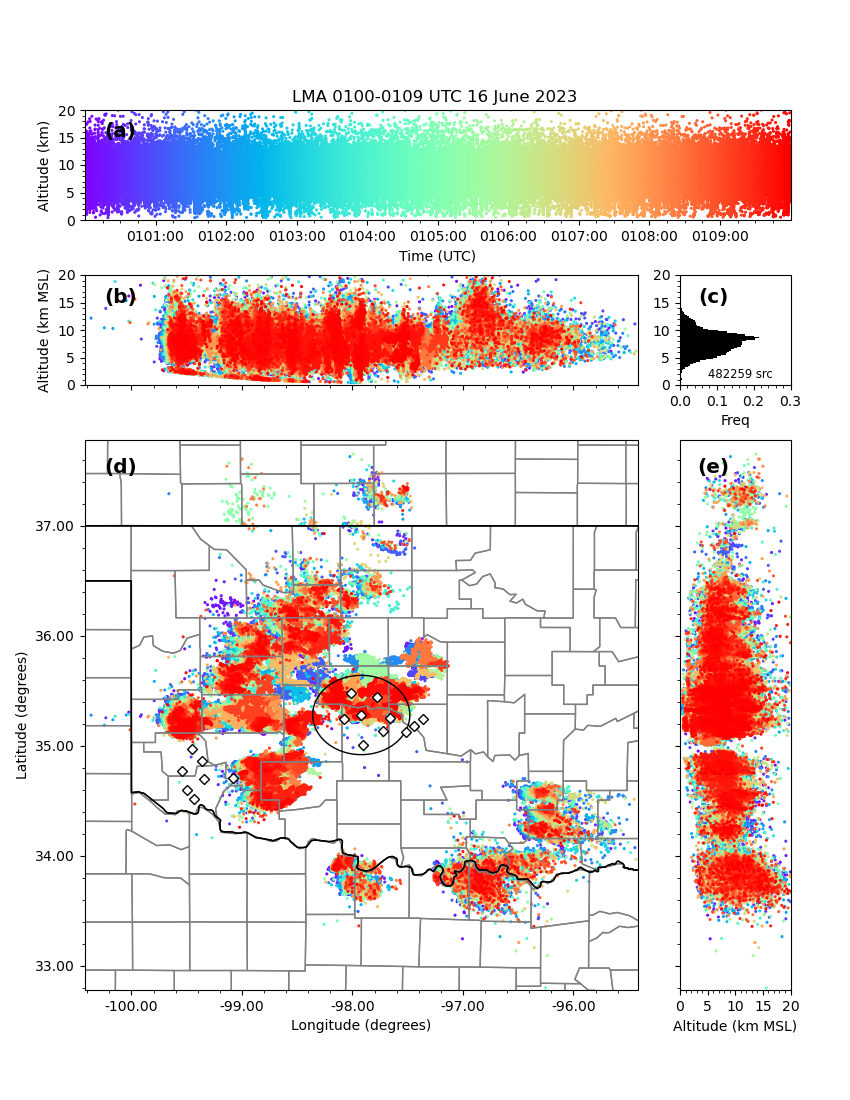

/Users/stgardner4/micromamba/envs/raxpol/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:799: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warnings.warn(f'Approximating coordinate system {crs!r} with '
/Users/stgardner4/micromamba/envs/raxpol/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:799: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warning

In [4]:
full_interact = InteractiveLMAPlot(lmad, clon=-97.92, clat=35.28, xlim=[-97.92-2.5, 2.5-97.92], ylim=[35.28-2.5, 35.28+2.5], zlim=[0, 20], plot_cmap='rainbow')

In [5]:
print(full_interact.bounds['t'][0].strftime('%Y-%m-%d %H:%M:%S.%f'))
print(full_interact.bounds['t'][1].strftime('%Y-%m-%d %H:%M:%S.%f'))

2023-06-16 01:00:00.000242
2023-06-16 01:09:59.999406


In [6]:
file_start = (lmad.event_time.data.astype(float)[0]//1e6)*1e6

filter_start = file_start + 4.13e11
filter_end = file_start + 4.14e11

filter_start = np.array([filter_start]).astype('datetime64[ns]')[0]
filter_end = np.array([filter_end]).astype('datetime64[ns]')[0]

print(filter_start)
print(filter_end)

flash_mask = (lmad.flash_time_start.data < filter_end) & (lmad.flash_time_end.data > filter_start)

lmad_filt_flashes = lmad.isel(number_of_flashes=flash_mask)
src_mask = np.isin(lmad_filt_flashes.event_parent_flash_id.data, lmad_filt_flashes.flash_id.data)
lmad_filt_flashes = lmad_filt_flashes.isel(number_of_events=src_mask)

print(lmad_filt_flashes.flash_event_count.data)
print(lmad_filt_flashes.flash_time_start.data)

lmad_filt_flashes

2023-06-16T01:06:53.000000000
2023-06-16T01:06:54.000000000
[  47    6 1036    1    1   46    7    1    1    1    1    1    4    1
    1    2    1    2    1    1    1    1    1    1    1  200   39    1
    1    1    1    1    1    1    2    1    1    2    1    1   88    1
    1    1    1  132    1    1    1    1    1    1   82    1    1    1
    2    8    1    3    1    1   42   17    1    4    1    1    1    1
    1    1    1  100    1    1    1    1    1    1    4    1    1    7
    1    3    1    1    1    1    1    1    1    2    1    1    1    1
    1   66    1    2    5    1    3    1    1    1    1    1    1]
['2023-06-16T01:06:52.965019500' '2023-06-16T01:06:52.973015774'
 '2023-06-16T01:06:53.025289388' '2023-06-16T01:06:53.026764217'
 '2023-06-16T01:06:53.029243474' '2023-06-16T01:06:53.041181414'
 '2023-06-16T01:06:53.042932295' '2023-06-16T01:06:53.063102591'
 '2023-06-16T01:06:53.094357728' '2023-06-16T01:06:53.097940289'
 '2023-06-16T01:06:53.098529054' '2023-06-16T01:06:

<xarray.Dataset>
Dimensions:                              (number_of_stations: 17,
                                          number_of_events: 2044,
                                          number_of_flashes: 111)
Coordinates:
  * number_of_flashes                    (number_of_flashes) uint64 41138 ......
Dimensions without coordinates: number_of_stations, number_of_events
Data variables: (12/42)
    network_center_latitude              float64 35.28
    network_center_longitude             float64 -97.92
    network_center_altitude              float64 417.9
    station_latitude                     (number_of_stations) float32 35.18 ....
    station_longitude                    (number_of_stations) float32 -97.44 ...
    station_altitude                     (number_of_stations) float32 346.0 ....
    ...                                   ...
    flash_event_count                    (number_of_flashes) uint32 47 6 ... 1 1
    event_parent_flash_id                (number_of_events) uint64 41138 ... ...
    event_x                              (number_of_events) float64 -1.453e+0...
    event_y                              (number_of_events) float64 -8.8e+03 ...
    event_z                              (number_of_events) float32 8.749e+03...
    flash_id                             (number_of_flashes) uint64 41138 ......
Attributes:
    source:                   VHF Lightning Mapping Array
    references:               
    event_algorithm_name:      ./lma_analysis -d 20230616 -t 010000 -s 600 -l...
    history:                  LMA source file created  Tue Jun 20 18:05:46 2023
    title:                    Lightning Mapping Array Dataset, L1b events and...
    comment:                  
    event_algorithm_version:   10.14.5R
    institution:              unknown
    flash_algorithm_name:     pyxlma DBSCAN
    flash_algorithm_version:  0.1
    production_site:          Default
    production_date:          2023-11-08 18:59:32 +00:00

/Users/stgardner4/micromamba/envs/raxpol/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:799: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warnings.warn(f'Approximating coordinate system {crs!r} with '


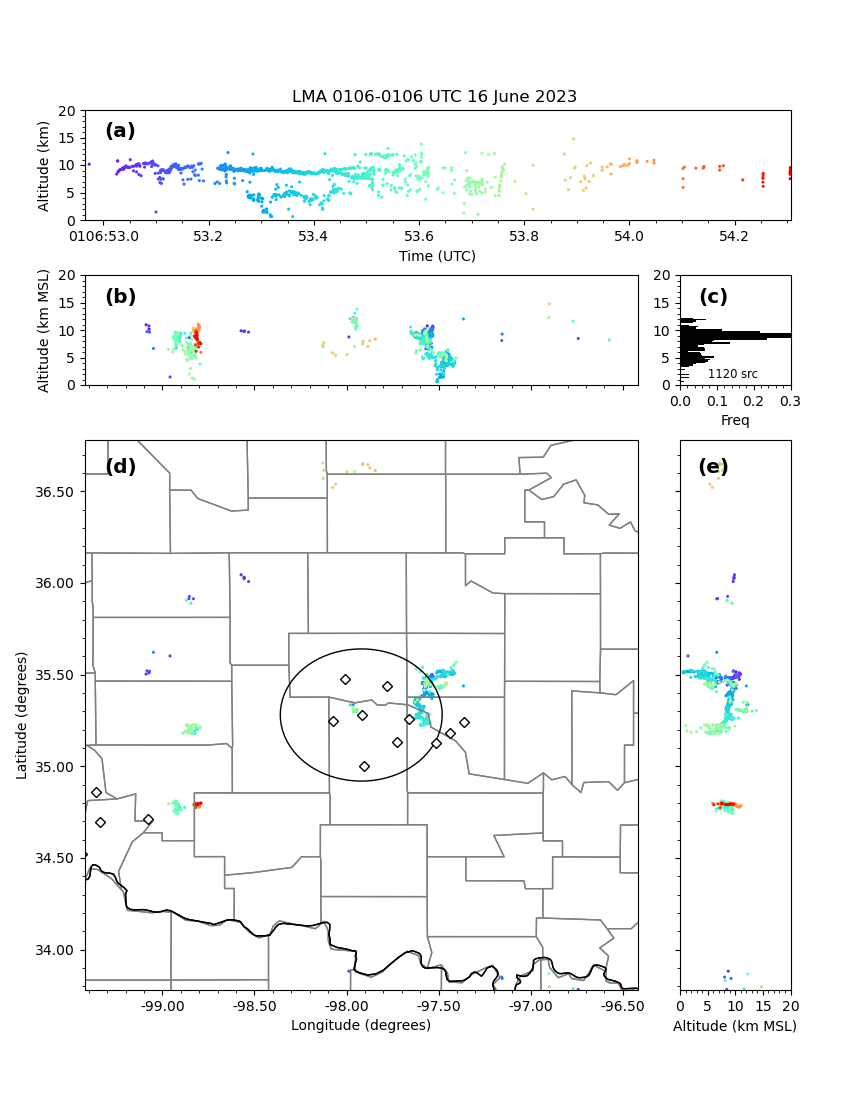

/Users/stgardner4/micromamba/envs/raxpol/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:799: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warnings.warn(f'Approximating coordinate system {crs!r} with '
/Users/stgardner4/micromamba/envs/raxpol/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:799: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warning

In [7]:
interact_filt = InteractiveLMAPlot(lmad_filt_flashes, clon=-97.92, clat=35.28, xlim=[-97.92-1.5, 1.5-97.92], ylim=[35.28-1.5, 35.28+1.5], zlim=[0, 20], plot_cmap='rainbow')

In [9]:
lmad_flash_case = lmad_filt_flashes.isel(number_of_flashes=2)

src_case_mask = np.isin(lmad_flash_case.event_parent_flash_id.data, lmad_flash_case.flash_id.data)
lmad_flash_case = lmad_flash_case.isel(number_of_events=src_case_mask)

print(lmad_flash_case.flash_time_start.data)
print(lmad_flash_case.flash_time_end.data)
print(lmad_flash_case.flash_event_count.data)
print(lmad_flash_case.flash_id.data)

2023-06-16T01:06:53.025289388
2023-06-16T01:06:53.508304294
1036
41141


/Users/stgardner4/micromamba/envs/raxpol/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:799: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warnings.warn(f'Approximating coordinate system {crs!r} with '


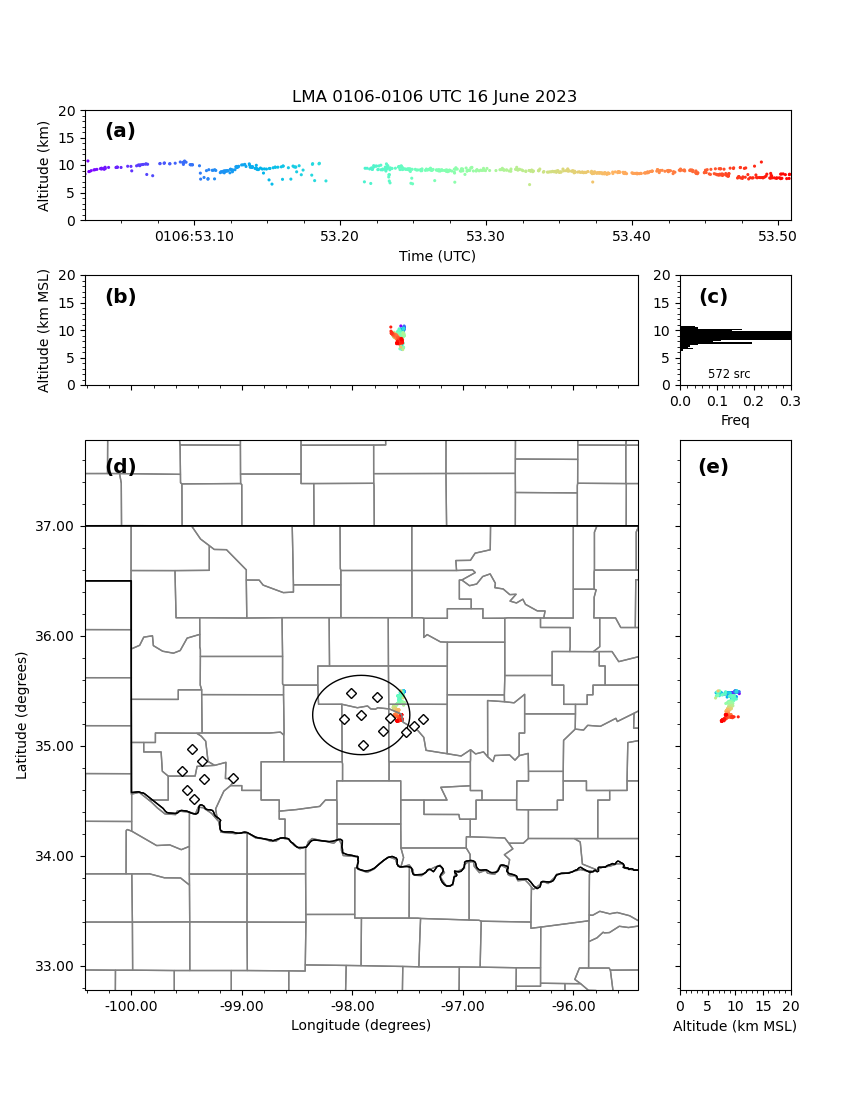

/Users/stgardner4/micromamba/envs/raxpol/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:799: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warnings.warn(f'Approximating coordinate system {crs!r} with '


In [11]:
interact_case = InteractiveLMAPlot(lmad_flash_case, clon=-97.92, clat=35.28, xlim=[-97.92-2.5, 2.5-97.92], ylim=[35.28-2.5, 35.28+2.5], zlim=[0, 20], plot_cmap='rainbow')

In [124]:
from matplotlib import pyplot as plt
plt.close('all')

| Case | Flash ID | lat/lon delta | time start delta | time end delta |
|---|---|---|---|---|
| 1 | 12650 | 0.5 | 0 | 0 |
| 2 | 13367 | 0.2 | -0.14 | .006 |
| 3 | 14134 | 0.2 | 0 | 0 |
| 4 | 22059 | 0.25 | -0.015 | .25 |
| 5 | 36458 (36468) | 0.5 | -0.02 | 0.55 |
| 6 | 41141 | 0.25 | -0.025 | .31 |

In [153]:
cases = [
    {
        'flid' : 12650,
        'deltalat' : 0.5,
        'deltalon' : 0.5,
        'start_offset' : 0,
        'end_offset' : 0
    }, {
        'flid' : 13367,
        'deltalat' : 0.2,
        'deltalon' : 0.2,
        'start_offset' : -0.14e9,
        'end_offset' : 0.006e9
    }, {
        'flid' : 14134,
        'deltalat' : 0.2,
        'deltalon' : 0.2,
        'start_offset' : 0,
        'end_offset' : 0
    }, {
        'flid' : 22059,
        'deltalat' : 0.25,
        'deltalon' : 0.25,
        'start_offset' : -0.015e9,
        'end_offset' : 0.25e9
    }, {
        'flid' : 36458,
        'deltalat' : 0.5,
        'deltalon' : 0.5,
        'start_offset' : -0.02e9,
        'end_offset' : 0.55e9
    }, {
        'flid' : 41141,
        'deltalat' : 0.25,
        'deltalon' : 0.25,
        'start_offset' : -0.025e9,
        'end_offset' : 0.31e9
    }
]

In [7]:
import xarray as xr
import numpy as np

In [8]:
rdr_test = xr.open_dataset('rax/RAXPOL-20230616-010344-E5.5-Z.nc')
rdr_test.sel(Azimuth=0, method='nearest')

ValueError: index must be monotonic increasing or decreasing

In [10]:
rdr_test.Azimuth.data[269]

0.001953125